In [1]:
import pandas as pd

# Load the dataset
file_path = 'Business dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

      Order ID  Generic Name Brand Name Company Name    Disease Medical Use  \
0  FY-2015-001  Aripiprazole    Abilify      Generic  Psychosis; depression   
1  IN-2015-002     Oxycodone  OxyContin      Generic                   Pain   
2  IN-2015-003     Oxycodone  OxyContin      Generic                   Pain   
3  IN-2015-004     Oxycodone  OxyContin      Generic                   Pain   
4  IN-2015-005     Oxycodone  OxyContin      Generic                   Pain   

  Invoice date  Company code ship to country Sold-to party Country Full Name  \
0   2015-11-09          5704          Mexico                          Mexico   
1   2015-06-30          5704        Thailand                        Thailand   
2   2015-12-05          5704         Vietnam                           Japan   
3   2015-05-09          5704       Australia                       Australia   
4   2015-07-09          5704       Singapore                       Singapore   

   Delivery Plant External Agent  Sales quan

In [13]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order ID                         3326 non-null   object        
 1   Generic Name                     3326 non-null   object        
 2   Brand Name                       3326 non-null   object        
 3   Company Name                     3326 non-null   object        
 4   Disease Medical Use              3326 non-null   object        
 5   Invoice date                     3326 non-null   datetime64[ns]
 6   Company code                     3326 non-null   int64         
 7   ship to country                  3326 non-null   object        
 8   Sold-to party Country Full Name  3326 non-null   object        
 9   Delivery Plant                   3326 non-null   int64         
 10  External Agent                   3326 non-null   object     

In [14]:
# Display basic statistics
print(df.describe())

                        Invoice date  Company code  Delivery Plant  \
count                           3326   3326.000000     3326.000000   
mean   2015-07-01 01:18:21.864101120   5790.534877     8139.996091   
min              2015-01-01 00:00:00   5566.000000     7904.000000   
25%              2015-04-01 06:00:00   5704.000000     8095.000000   
50%              2015-06-29 12:00:00   5779.000000     8095.000000   
75%              2015-10-01 00:00:00   5887.000000     8209.000000   
max              2015-12-31 00:00:00   5938.000000     8370.000000   
std                              NaN     97.658222      148.833525   

       Sales quantity  Price TC /Kg       Revenue  External commissions  
count     3326.000000   3326.000000    3326.00000           3326.000000  
mean       255.105532    404.814191  103171.70926           1689.373221  
min          1.000000    204.000000     243.00000              0.000000  
25%        129.000000    314.000000   49541.25000              0.000000  

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)

Duplicate rows: 0


# DATA VISUALIZATION

## Sales Performance Analysiss


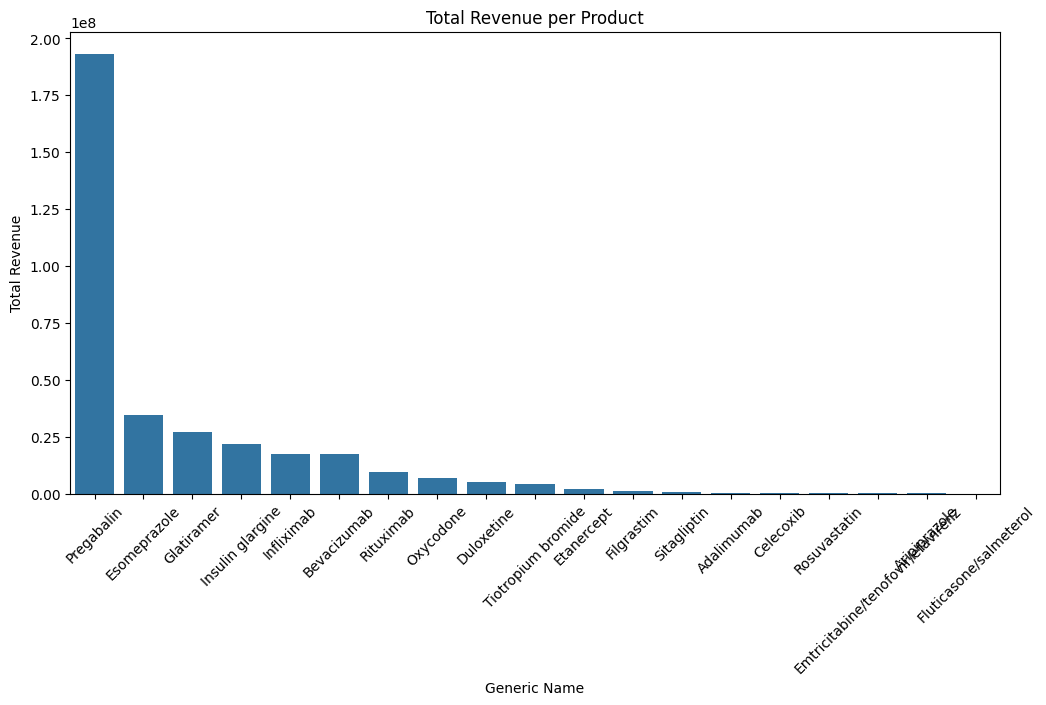

In [10]:
# Calculate total revenue per product
product_revenue = df.groupby('Generic Name')['Revenue'].sum().sort_values(ascending=False)

# Visualize total revenue per product
plt.figure(figsize=(12, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Total Revenue per Product')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()



C:\Users\Hp\AppData\Local\Temp\ipykernel_12396\4126163344.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M', on='Invoice date')['Revenue'].sum()


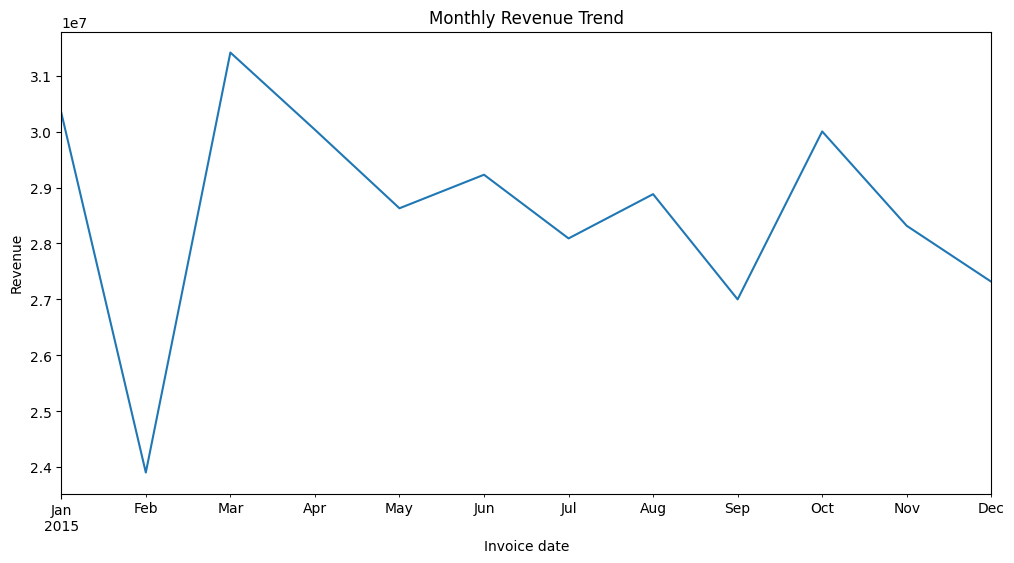

In [11]:
# Create a monthly revenue trend
df['Invoice date'] = pd.to_datetime(df['Invoice date'])
monthly_revenue = df.resample('M', on='Invoice date')['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()


In [12]:
# Insights on highest and lowest revenue-generating products
highest_product = product_revenue.idxmax()
lowest_product = product_revenue.idxmin()
print(f'Highest revenue-generating product: {highest_product}')
print(f'Lowest revenue-generating product: {lowest_product}')

Highest revenue-generating product: Pregabalin
Lowest revenue-generating product: Fluticasone/salmeterol


# Country-Specific Market Analysis
##  Identify the most profitable and highest-volume markets.

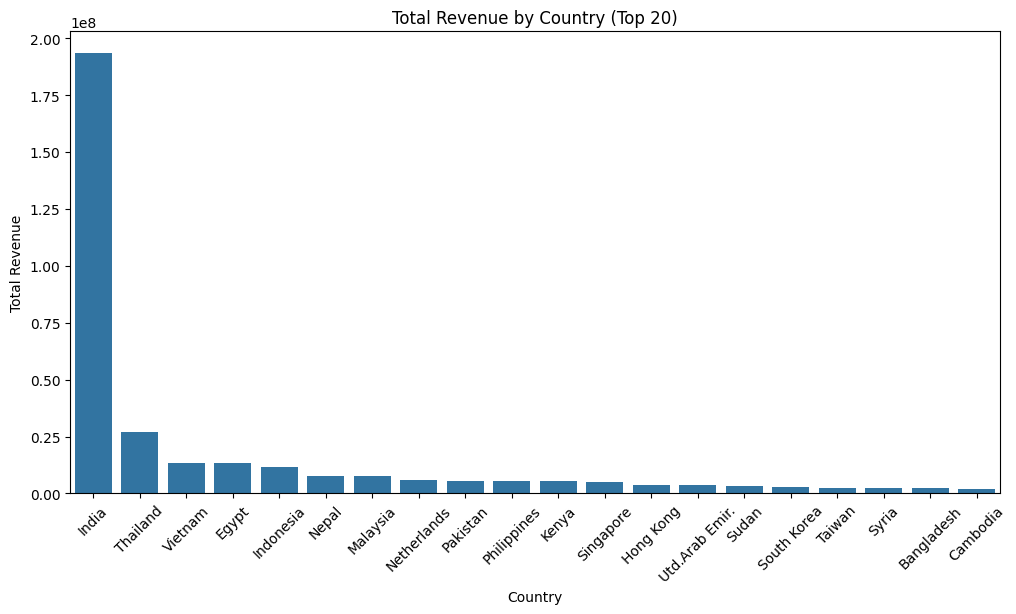

Top 20 Countries by Revenue:
ship to country
India             193340264
Thailand           27003115
Vietnam            13522609
Egypt              13278208
Indonesia          11510346
Nepal               7842394
Malaysia            7805616
Netherlands         5767851
Pakistan            5594622
Philippines         5456271
Kenya               5444711
Singapore           4975063
Hong Kong           3896386
Utd.Arab Emir.      3744946
Sudan               3036276
South Korea         2753439
Taiwan              2527356
Syria               2317088
Bangladesh          2307584
Cambodia            2080242
Name: Revenue, dtype: int64


In [21]:
# Total revenue by country
country_revenue = df.groupby('ship to country')['Revenue'].sum().sort_values(ascending=False)

# Get the top 20 countries
top_countries = country_revenue.head(20)

# Visualize total revenue by the top 20 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Total Revenue by Country (Top 20)')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.show()

# Print the top 20 countries and their revenue
print("Top 20 Countries by Revenue:")
print(top_countries)

# Time-Based Sales Trends and Seasonality Analysis
## Objective: Understand how sales fluctuate over time.

<Figure size 1200x600 with 0 Axes>

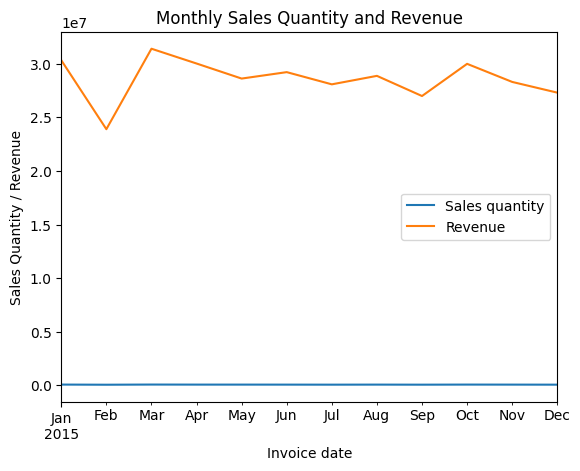

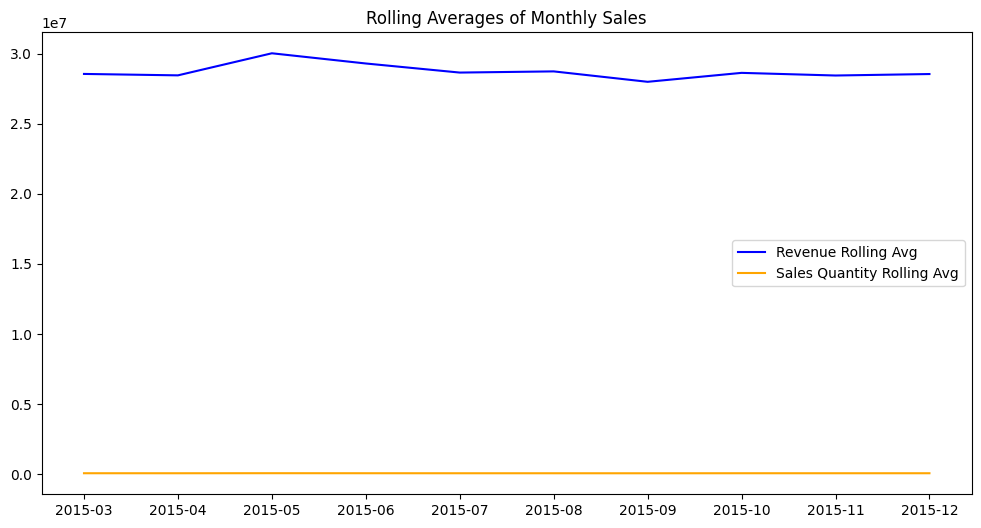

In [18]:
# Plot sales quantity and revenue per month for each year
monthly_sales = df.groupby(df['Invoice date'].dt.to_period('M')).agg({'Sales quantity': 'sum', 'Revenue': 'sum'})

plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Quantity and Revenue')
plt.ylabel('Sales Quantity / Revenue')
plt.show()

# Analyze patterns for seasonality
# You can use rolling averages to smooth out the data
monthly_sales['Revenue Rolling'] = monthly_sales['Revenue'].rolling(window=3).mean()
monthly_sales['Sales Quantity Rolling'] = monthly_sales['Sales quantity'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales['Revenue Rolling'], label='Revenue Rolling Avg', color='blue')
plt.plot(monthly_sales.index.astype(str), monthly_sales['Sales Quantity Rolling'], label='Sales Quantity Rolling Avg', color='orange')
plt.title('Rolling Averages of Monthly Sales')
plt.legend()
plt.show()

# Product Revenue and Quantity Correlation
## Objective: Explore the relationship between sales quantity, product price, and total revenue.

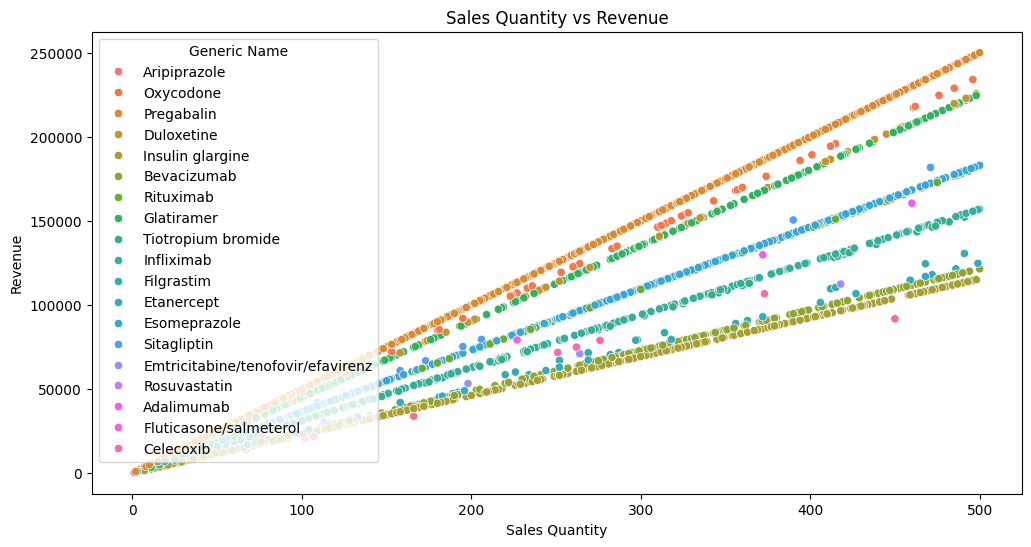

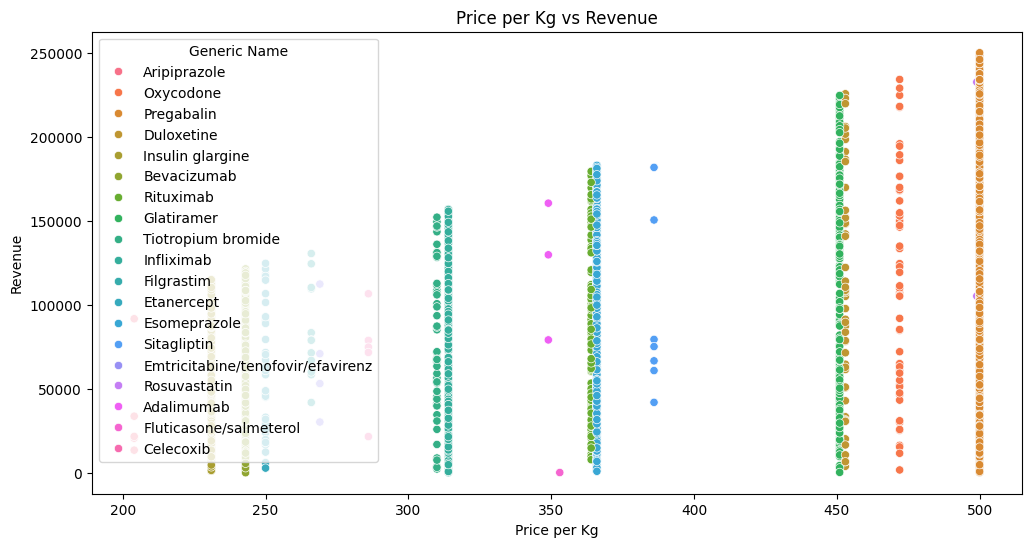

                Sales quantity   Revenue  Price TC /Kg
Sales quantity        1.000000  0.877512     -0.006533
Revenue               0.877512  1.000000      0.412873
Price TC /Kg         -0.006533  0.412873      1.000000


In [19]:
# Create scatter plots showing the relationship between sales quantity and revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sales quantity', y='Revenue', hue='Generic Name')
plt.title('Sales Quantity vs Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.show()

# Analyze price correlation
df['Price TC /Kg'] = df['Price TC /Kg'].replace({'\$': '', ',': ''}, regex=True).astype(float)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price TC /Kg', y='Revenue', hue='Generic Name')
plt.title('Price per Kg vs Revenue')
plt.xlabel('Price per Kg')
plt.ylabel('Revenue')
plt.show()

# Present findings
correlation = df[['Sales quantity', 'Revenue', 'Price TC /Kg']].corr()
print(correlation)

# Predictive Modeling
## Purpose: Use historical data to predict future outcomes.
### Techniques: Linear regression, decision trees, and time series forecasting.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Prepare data for regression
X = df[['Sales quantity', 'Price TC /Kg']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 232524143.69
R-squared: 0.95


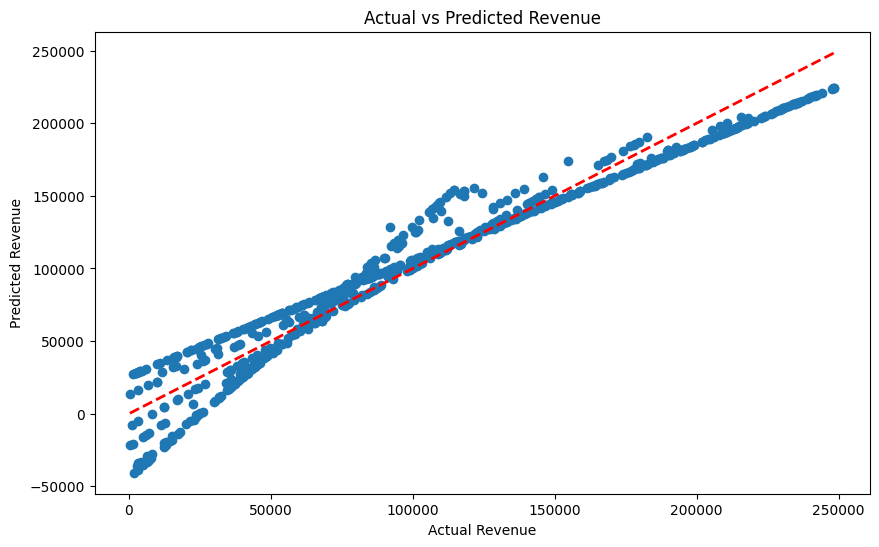

                Coefficient
Sales quantity   399.243318
Price TC /Kg     259.902539

Actionable Insights:
Increasing sales quantity will likely increase revenue.
Increasing price per kg will likely increase revenue.


In [25]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()

# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Actionable Insights
print("\nActionable Insights:")
if model.coef_[0] > 0:
    print("Increasing sales quantity will likely increase revenue.")
if model.coef_[1] > 0:
    print("Increasing price per kg will likely increase revenue.")

# Clustering Analysis
## Purpose: Group similar data points together.
### Techniques: K-means clustering and hierarchical clustering.

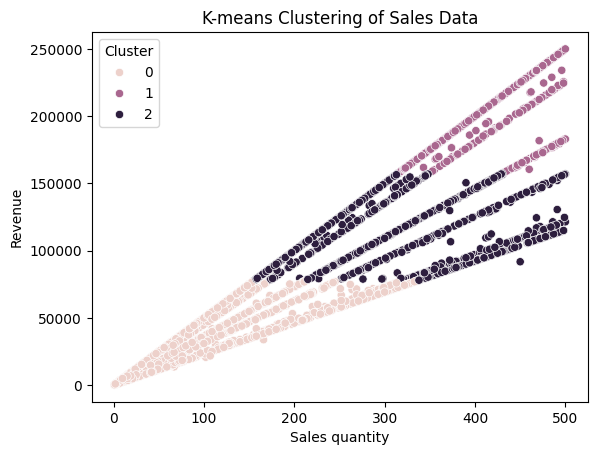

In [26]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Sales quantity', 'Revenue']])
sns.scatterplot(data=df, x='Sales quantity', y='Revenue', hue='Cluster')
plt.title('K-means Clustering of Sales Data')
plt.show()